# O(n) - Model

In [1]:
# import ising_lib
# from imp import reload 
# reload(ising_lib)
from ising_lib import *
from numpy import *
from matplotlib import pyplot as plt
%matplotlib inline
from numpy import *

/home/aravind/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Analysis of Data

In [2]:
def variance(X):
    return var(X)
def Average(X):
    return average(X)
def analyze(temparature,L,E,M):
    en,en_err=jacknife(E,Average)
    mag,mag_err=jacknife(M,Average)
    sp_heat,sp_heat_err=jacknife(E,variance)
    sp_heat/=(temparature*temparature*L)
    sp_heat_err/=(temparature*temparature*L)
    sucep,sucep_err=jacknife(M,variance)
    sucep/=(temparature*L)
    sucep_err/=(temparature*L)
    return [mag,mag_err],[sp_heat,sp_heat_err],[sucep,sucep_err],[en,en_err]

### Extracting values from Simulation Data

SET THE FOLDER TO BE ANALYZED HERE ,THE FOLDER SHOULD HAVE 'fnames.txt' WITH NAMES OF 
FILES TO BE ANALYZED

In [19]:
# tag_name='space'
tag_name='N10_bkp'
BASE_FOLDER='../simulation_data/resampled/'+tag_name+'/'
f=open(BASE_FOLDER+"fnames.txt",'r')
fnames=[]
l=f.readline()
while l:
    fnames.append(BASE_FOLDER+l[:-1])
    l=f.readline()
f.close()
print("Files to be analyzed : " ,len(fnames))

FileNotFoundError: [Errno 2] No such file or directory: '../simulation_data/resampled/N10_bkp/fnames.txt'

### Extracting data from files

In [6]:
def extract_data(fnames,MAG_TYPE='magentization'):    
    analy=dict()
    count=0
    extracted_vals=dict()
    rslt=open('../extracted_data/'+tag_name+'_analysis','w')
    rslt.write('Temp,N,J,H0,Energy,EnErr,Magetization,MagErr,Specific_Heat,SP_Err,Succeptibility,succepErr')
    dat=get_data_OnModel(fnames[0]);
    for i in range(len(dat['magentization_n'])):
        rslt.write(',mg'+str(i))
    rslt.write("\n")
    l=len(fnames)
    for fn in fnames:
        count+=1
    #     if i >1  : break
        dat=get_data_OnModel(fn);
        try:
            L=dat['params']['length of lattice'];
        except:
            L=dat['params']['N'];    
        try:
            T=dat['params']['T'];
        except:
            T=dat['params']['T'];    
        J=dat['params']['J'];    
        H0=dat['params']['H0'];
        N=pow(L,dat['params']['dim'])
        n=dat['params']['n']
        if L not in extracted_vals.keys():
            extracted_vals.update({L:{'T':[],'J':[],'H0':[],'en':[],'en_err':[],'mag':[],'mag_err':[],
                                      'sp_heat':[],'sp_heat_err':[],'sucep':[],'sucep_err':[],'phase':[],'phase_err':[]}})
            extracted_vals[L].update({'mag_'+str(i):[] for i in range(n)})
            extracted_vals[L].update({'mag_'+str(i)+"_err":[] for i in range(n)})
        print("Doing Leng :",len(dat['energy'])," for ",count,"/",l, " L : ",L," T : ",T," \tH0 : ",H0,"\tJ : ",J)

        phase=[arctan2(j,i) for i,j in zip(dat['magentization_n'][0],dat['magentization_n'][1]) ]
        extracted_vals[L]['T'].append(T)
        extracted_vals[L]['J'].append(J)
        extracted_vals[L]['H0'].append(H0)
        
        item,item_err=jacknife(phase,Average)
        extracted_vals[L]['phase'].append(item)
        
        item,item_err=jacknife(dat['energy'],Average)
        item/=N
        item_err/=N
        extracted_vals[L]['en'].append(item)
        extracted_vals[L]['en_err'].append(item_err)
        
        item,item_err=jacknife(dat['magentization'],Average)
        extracted_vals[L]['mag'].append(item)
        extracted_vals[L]['mag_err'].append(item_err)
        
        t_scale=T
        item,item_err=jacknife(dat['energy'],variance)
        item/=(t_scale*t_scale*N)
        item_err/=(t_scale*t_scale*N)
        extracted_vals[L]['sp_heat'].append(item)
        extracted_vals[L]['sp_heat_err'].append(item_err)
        
        t_scale=T/J
        item,item_err=jacknife(dat['magentization'],variance)
        item/=(t_scale*N)
        item_err/=(t_scale*N)
        extracted_vals[L]['sucep'].append(item)
        extracted_vals[L]['sucep_err'].append(item_err)
        
        rslt.write(str(T)+","+str(L)+","+str(J)+","+str(H0))
        rslt.write(","+str(extracted_vals[L]['en'][-1])+","+str(extracted_vals[L]['en_err'][-1]))
        rslt.write(","+str(extracted_vals[L]['mag'][-1])+","+str(extracted_vals[L]['mag_err'][-1]))
        rslt.write(","+str(extracted_vals[L]['sp_heat'][-1])+","+str(extracted_vals[L]['sp_heat_err'][-1]))
        rslt.write(","+str(extracted_vals[L]['sucep'][-1])+","+str(extracted_vals[L]['sucep_err'][-1]))
        for i in range(n):
            item,item_err=jacknife(dat['magentization_n'][i],Average)
            extracted_vals[L]['mag_'+str(i)].append(item)
            extracted_vals[L]['mag_'+str(i)+'_err'].append(item_err)
            rslt.write(","+str( extracted_vals[L]['mag_'+str(i)][-1])+","+str( extracted_vals[L]['mag_'+str(i)+"_err"][-1]))        
        rslt.write("\n")
    return extracted_vals
    rslt.close()

In [7]:
jk=extract_data(fnames)

Doing Leng : 64  for  1 / 30  L :  24  T :  1  	H0 :  0.0081 	J :  0.5
Doing Leng : 112  for  2 / 30  L :  24  T :  1  	H0 :  0.0121 	J :  0.5
Doing Leng : 119  for  3 / 30  L :  24  T :  1  	H0 :  0.0144 	J :  0.5
Doing Leng : 193  for  4 / 30  L :  24  T :  1  	H0 :  0.0169 	J :  0.5
Doing Leng : 106  for  5 / 30  L :  24  T :  1  	H0 :  0.0196 	J :  0.5
Doing Leng : 141  for  6 / 30  L :  24  T :  1  	H0 :  0.0225 	J :  0.5
Doing Leng : 130  for  7 / 30  L :  24  T :  1  	H0 :  0.0016 	J :  0.5
Doing Leng : 3862  for  8 / 30  L :  24  T :  1  	H0 :  0.0001 	J :  0.5
Doing Leng : 195  for  9 / 30  L :  24  T :  1  	H0 :  0.0016 	J :  0.5
Doing Leng : 119  for  10 / 30  L :  24  T :  1  	H0 :  0.0025 	J :  0.5
Doing Leng : 3347  for  11 / 30  L :  24  T :  1  	H0 :  0.0001 	J :  0.5
Doing Leng : 601  for  12 / 30  L :  24  T :  1  	H0 :  0.0004 	J :  0.5
Doing Leng : 124  for  13 / 30  L :  24  T :  1  	H0 :  0.0009 	J :  0.5
Doing Leng : 288  for  14 / 30  L :  24  T :  1  	H0 :  0.0

### Reading from Extracted Data

In [13]:
def read_data(tag_name):
    f=open('../extracted_data/'+tag_name+'_analysis','r')
    X=True
    while(X):
        X=False
        extracted_vals=dict()
        l=f.readline()
        item=l[:-1].split(",")
        item.pop(1)
        the_dict={it:[] for it in item}
        l=f.readline()
        i=0
        while l:
            i+=1
            try:
                it=l[:-1].split(',')
        #         print(it)
                L=int(it[1])
                it.pop(1)
                if L not in extracted_vals.keys():
                    extracted_vals.update({L:dict(the_dict)})
                for idx,val in zip(item,it):
                    extracted_vals[L][idx].append(float(val))
                l=f.readline()
            except:
                print(it)
                l=f.readline()
        f.close()
        print(i ," DATA LINES READ")
        return extracted_vals

In [14]:
def plot_plots(extracted_vals,x_axis='J'):
    f,axi=plt.subplots(ncols=2,nrows=2,figsize=(10,10))
    ax=[axi[0][0],axi[0][1],axi[1][0],axi[1][1]]#,axi[1][0],axi[1][1]]
    t=True
    while t:
        t=False
        lbl='Succeptibility'
        dim=3
        for i in extracted_vals.keys():
            Y=[k for k in extracted_vals[i][lbl]]
            Y_err=[k for k in extracted_vals[i]['succepErr']]
            ax[0].errorbar(extracted_vals[i][x_axis],Y,Y_err,fmt='o',label="L = "+str(i))
            ax[0].set_xlabel(x_axis)
            ax[0].set_ylabel(lbl)
            ax[0].set_title(lbl+ " vs "+ x_axis)
            ax[0].legend(loc=0)
        lbl="Magetization"
        for i in extracted_vals.keys():
            Y=[(k/i**dim) for k in extracted_vals[i][lbl]]
            Y_err=[(k/i**dim) for k in extracted_vals[i]["MagErr"]]
            ax[1].errorbar(extracted_vals[i][x_axis],Y,Y_err,fmt='o',label="L = "+str(i))
            ax[1].set_xlabel(x_axis)
            ax[1].set_ylabel(lbl)
            ax[1].set_title(lbl+ " vs "+x_axis)
            ax[1].legend(loc=0)
        lbl='Specific_Heat'
        for i in extracted_vals.keys():
            Y=[k for k in extracted_vals[i][lbl]]
            Y_err=[k for k in extracted_vals[i]["SP_Err"]]
            ax[2].errorbar(extracted_vals[i][x_axis],Y,Y_err,fmt='o',label="L = "+str(i))
            ax[2].set_xlabel(x_axis)
            ax[2].set_ylabel(lbl)
            ax[2].set_title(lbl+ " vs "+x_axis)
            ax[2].legend(loc=0)
       
        lbl="Energy"
        for i in extracted_vals.keys():
            Y=[(k/i**2) for k in extracted_vals[i][lbl]]
            Y_err=[(k/i**2) for k in extracted_vals[i]["EnErr"]]
            ax[3].errorbar(extracted_vals[i][x_axis],Y,Y_err,fmt='o',label="L = "+str(i))
            ax[3].set_xlabel(x_axis)
            ax[3].set_ylabel(lbl)
            ax[3].set_title(lbl+ " vs "+x_axis)
            ax[3].legend(loc=0)

11  DATA LINES READ


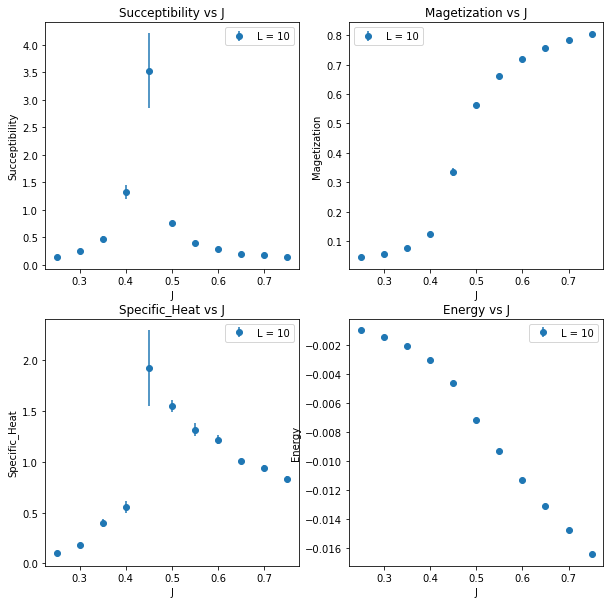

In [16]:
extracted_vals=read_data(tag_name)
plot_plots(extracted_vals,x_axis='J')

## Phase and time history analysis @ Meeting

In [26]:
dat=get_data_xyModel(fnames[0])

In [28]:
tag_name='N16_RG_sbf_MIX'
BASE_FOLDER='../simulation_data/raw/'+tag_name+'/'
f=open(BASE_FOLDER+"fnames.txt",'r')
fnames=[]
l=f.readline()
while l:
    fnames.append(BASE_FOLDER+l[:-1])
    l=f.readline()
f.close()
print("Files to be analyzed : " ,len(fnames))

Files to be analyzed :  8


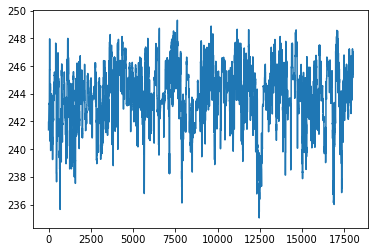

In [31]:
datMCS=get_data_xyModel(fnames[1])
n0=0
n=-1
plt.plot(datMCS['time'][n0:n],datMCS['magentization'][n0:n])

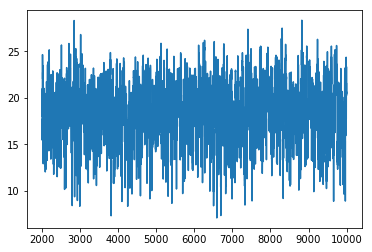

In [79]:
datW=get_data_xyModel(fnames[0])
n0=2000
n=10000
plt.plot(datW['time'][n0:n],datW['energy'][n0:n])

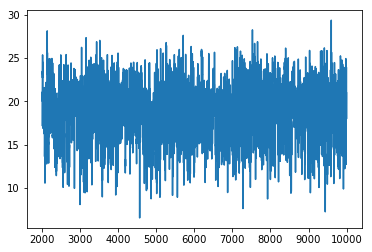

In [83]:
datMIX=get_data_xyModel(fnames[0])
n0=2000
n=10000
plt.plot(datMIX['time'][n0:n],datMIX['energy'][n0:n])

In [67]:
ang=[i*2*pi/400-pi for i in range(400)]
c4=[cos(4*i) for i in ang]
c8=[cos(8*i) for i in ang]

In [68]:
a=0.06
b=0.15

(-0.7853981633974483, 0.7853981633974483)

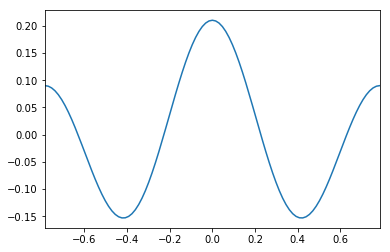

In [69]:
x=ang
y=[a*i+b*j for i,j in zip(c4,c8)]
plt.plot(x,y)
plt.xlim([-pi/4,pi/4])

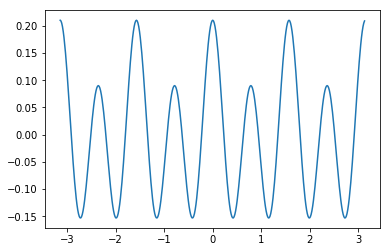

In [70]:
plt.plot(x,y)

In [105]:
tag_name='N08_xy'
BASE_FOLDER='../simulation_data/raw/'+tag_name+'/'
f=open(BASE_FOLDER+"fnames.txt",'r')
fnames=[]
l=f.readline()
while l:
    fnames.append(BASE_FOLDER+l[:-1])
    l=f.readline()
f.close()
print("Files to be analyzed : " ,len(fnames))

Files to be analyzed :  15


In [106]:
 dat=get_data_xyModel(fnames[0]);

In [84]:
fnames

['../simulation_data/raw/N08_xy/L_8_T_0.250_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_0.370_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_0.490_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_0.610_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_0.730_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_0.850_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_0.970_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_1.090_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_1.210_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_1.330_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_1.450_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_1.570_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_1.690_J_1.000_

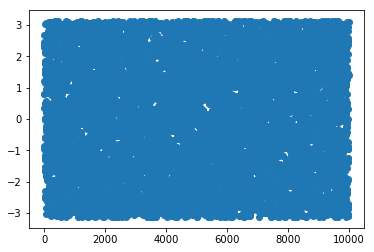

In [107]:
n0=0
n=10000
phase_hist=[arctan2(j,i) for i,j in zip(dat['magentization_x'][n0:n],dat['magentization_y'][n0:n])]
plt.scatter(dat['time'][n0:n],phase_hist)

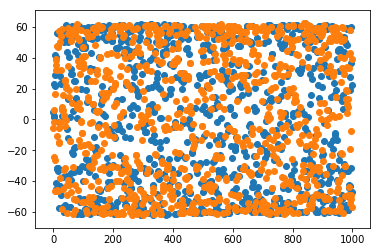

In [85]:
n0=0
n=1000
plt.scatter(dat['time'][n0:n],dat['magentization_y'][n0:n])
# plt.figure()
plt.scatter(dat['time'][n0:n],dat['magentization_x'][n0:n])

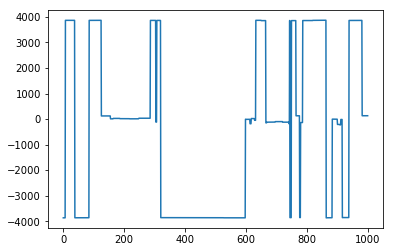

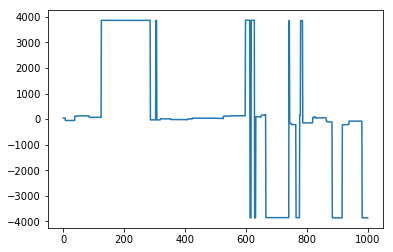

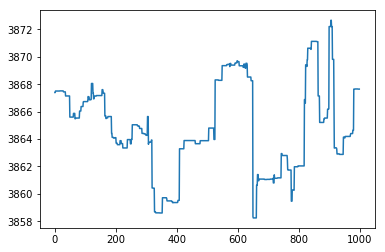

In [91]:
n0=0
n=1000
plt.plot(dat['time'][n0:n],dat['magentization_y'][n0:n])
plt.figure()
plt.plot(dat['time'][n0:n],dat['magentization_x'][n0:n])
plt.figure()
plt.plot(dat['time'][n0:n],dat['magentization'][n0:n])
